http://datareview.info/article/8-metodov-sravneniya-algoritmov-mashinnogo-obucheniya-na-r/

In [21]:
# options("repos")
# getOption("repos")
# conda install r-lattice
# conda install r-e1071

In [26]:
install.packages("mlbench", repos="http://cran.rstudio.com/")
install.packages("kernlab", repos="http://cran.rstudio.com/") 


The downloaded source packages are in
	‘/tmp/Rtmpj7v0HC/downloaded_packages’


In [18]:
# load libraries
library(mlbench)
library(caret)
# load the dataset
data(PimaIndiansDiabetes)

In [27]:
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)
# CART
set.seed(7)
fit.cart <- train(diabetes~., data=PimaIndiansDiabetes, method="rpart", trControl=control)
# LDA
set.seed(7)
fit.lda <- train(diabetes~., data=PimaIndiansDiabetes, method="lda", trControl=control)
# SVM
set.seed(7)
fit.svm <- train(diabetes~., data=PimaIndiansDiabetes, method="svmRadial", trControl=control)
# kNN
set.seed(7)
fit.knn <- train(diabetes~., data=PimaIndiansDiabetes, method="knn", trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(diabetes~., data=PimaIndiansDiabetes, method="rf", trControl=control)
# collect resamples
results <- resamples(list(CART=fit.cart, LDA=fit.lda, SVM=fit.svm, KNN=fit.knn, RF=fit.rf))

Loading required package: kernlab


In [28]:
# summarize differences between models
summary(results)


Call:
summary.resamples(object = results)

Models: CART, LDA, SVM, KNN, RF 
Number of resamples: 30 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
CART 0.6234  0.7115 0.7403 0.7382  0.7760 0.8442    0
LDA  0.6711  0.7532 0.7662 0.7759  0.8052 0.8701    0
SVM  0.6711  0.7403 0.7582 0.7651  0.7890 0.8961    0
KNN  0.6184  0.6984 0.7321 0.7299  0.7532 0.8182    0
RF   0.6711  0.7273 0.7516 0.7617  0.7890 0.8571    0

Kappa 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
CART 0.1585  0.3296 0.3765 0.3934  0.4685 0.6393    0
LDA  0.2484  0.4196 0.4516 0.4801  0.5512 0.7048    0
SVM  0.2187  0.3889 0.4167 0.4520  0.5003 0.7638    0
KNN  0.1113  0.3228 0.3867 0.3819  0.4382 0.5867    0
RF   0.2624  0.3787 0.4516 0.4588  0.5193 0.6781    0


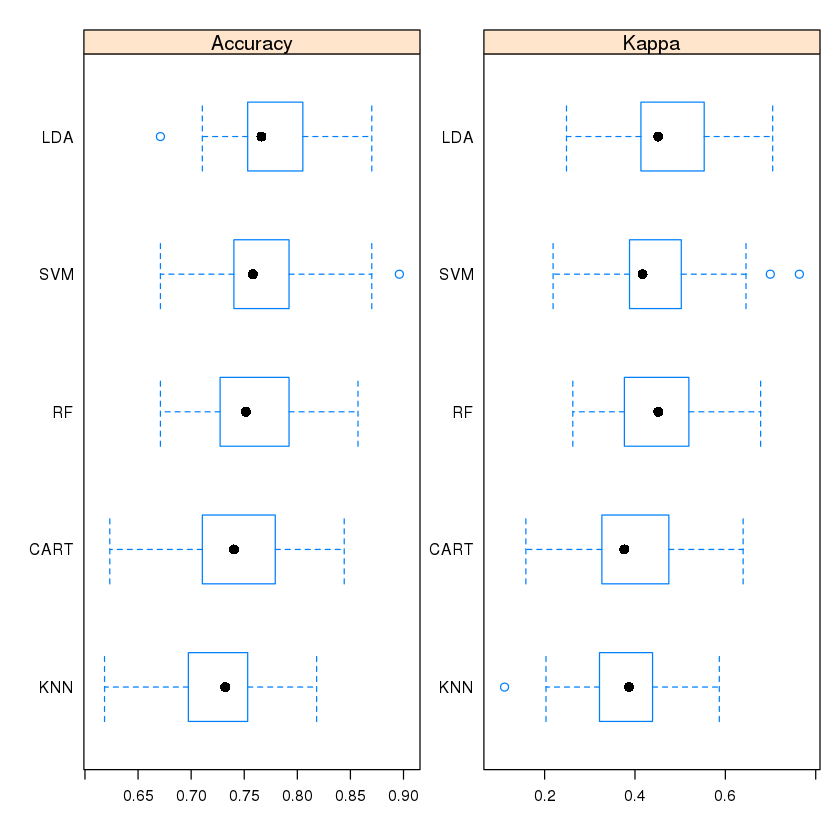

In [29]:
# box and whisker plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(results, scales=scales)

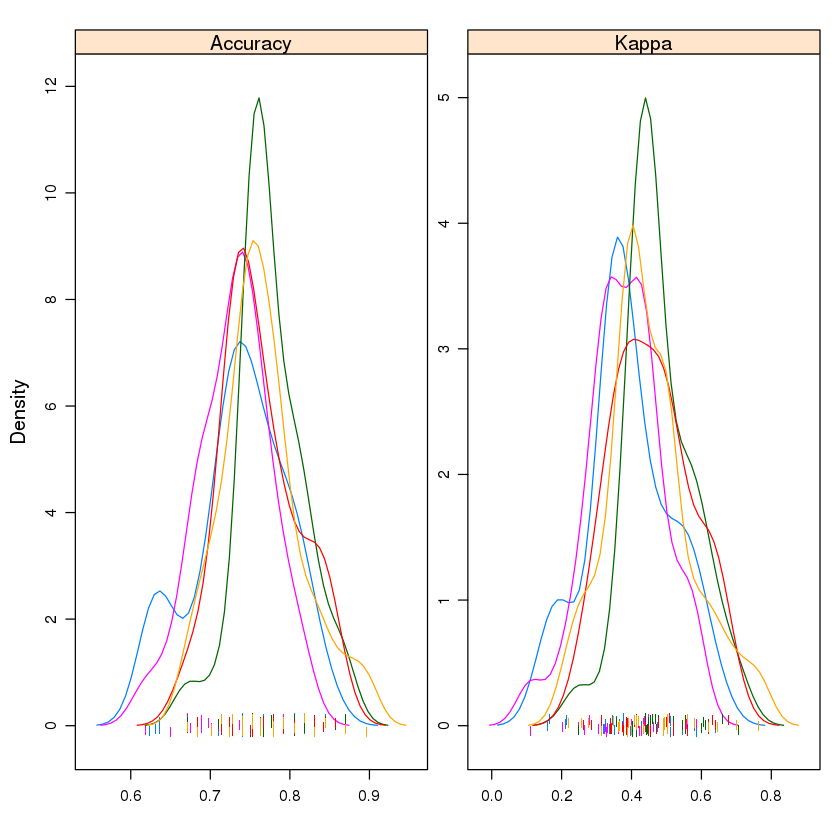

In [30]:
# density plots of accuracy
scales <- list(x=list(relation="free"), y=list(relation="free"))
densityplot(results, scales=scales, pch = "|")

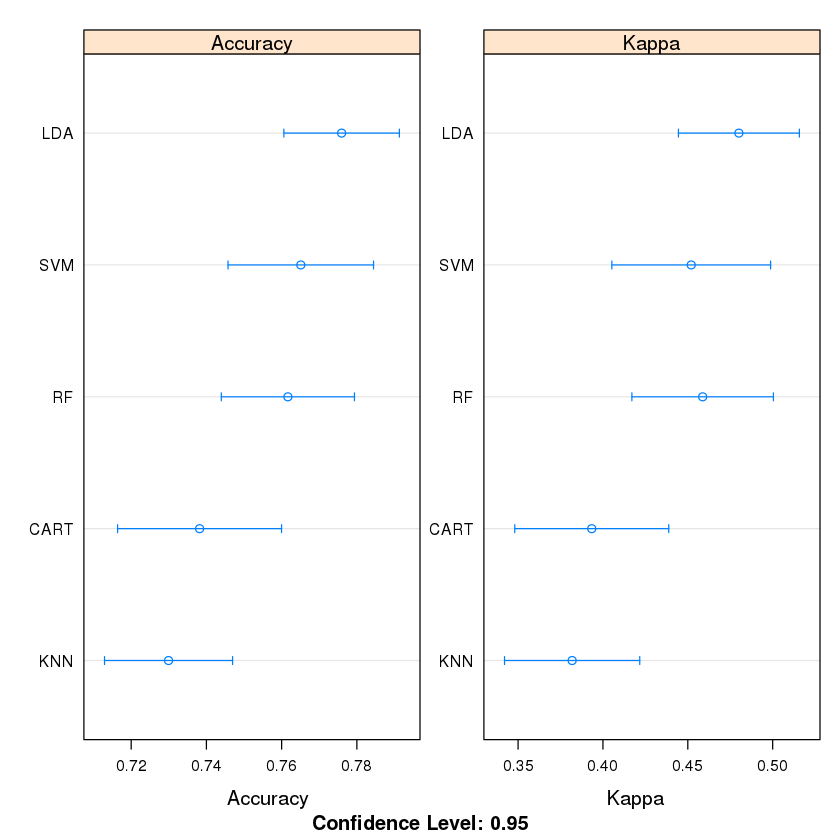

In [31]:
# dot plots of accuracy
scales <- list(x=list(relation="free"), y=list(relation="free"))
dotplot(results, scales=scales)

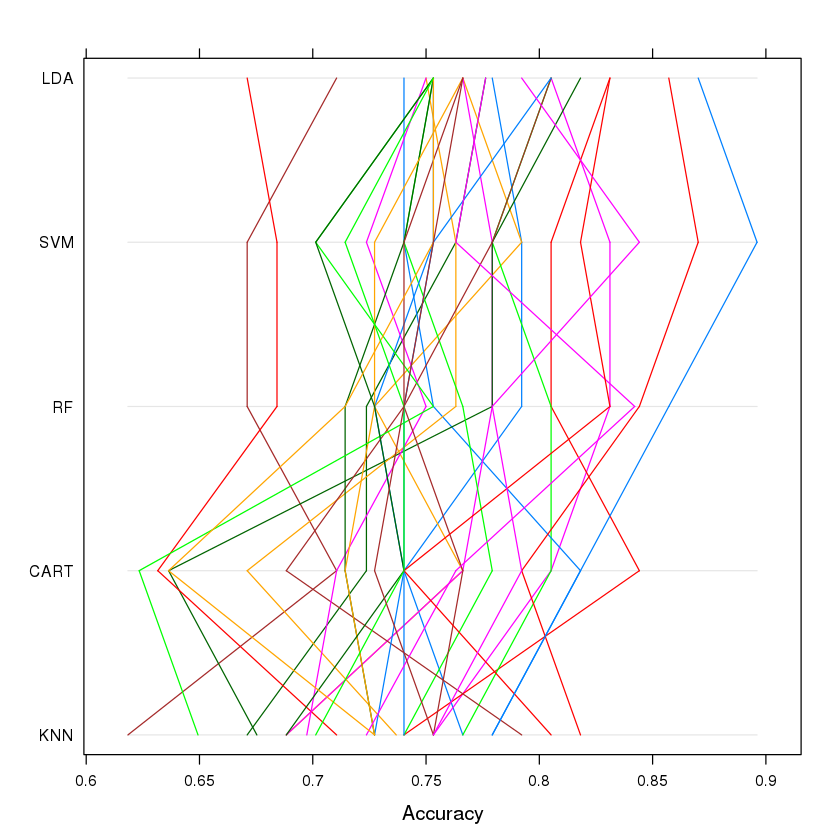

In [32]:
# parallel plots to compare models
parallelplot(results)

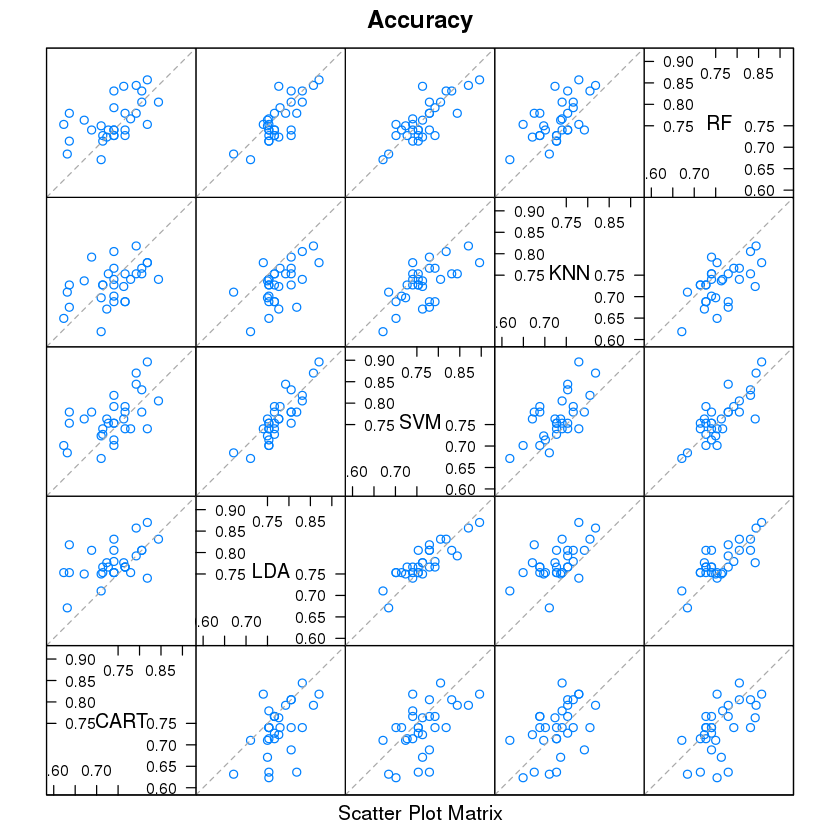

In [33]:
# pair-wise scatterplots of predictions to compare models
splom(results)

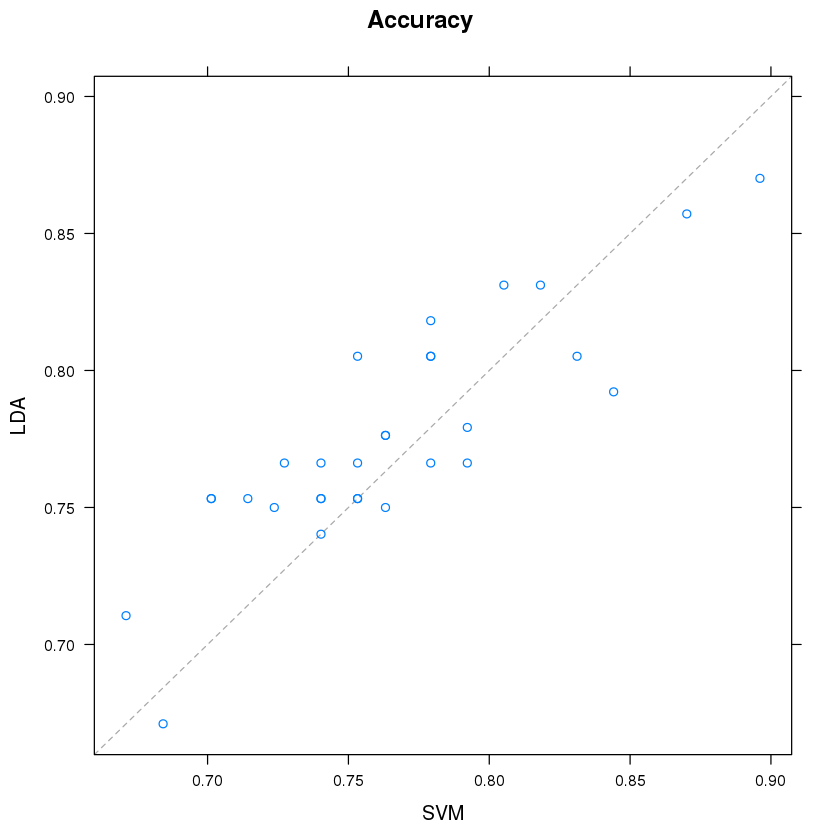

In [34]:
# xyplot plots to compare models
xyplot(results, models=c("LDA", "SVM"))

In [35]:
# difference in model predictions
diffs <- diff(results)
# summarize p-values for pair-wise comparisons
summary(diffs)


Call:
summary.diff.resamples(object = diffs)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
     CART      LDA       SVM       KNN       RF       
CART           -0.037759 -0.026908  0.008248 -0.023473
LDA  0.0050068            0.010851  0.046007  0.014286
SVM  0.0919580 0.3390336            0.035156  0.003435
KNN  1.0000000 1.218e-05 0.0007092           -0.031721
RF   0.1722106 0.1349151 1.0000000 0.0034441          

Kappa 
     CART     LDA       SVM       KNN       RF       
CART          -0.086692 -0.058612  0.011552 -0.065345
LDA  0.001548            0.028079  0.098243  0.021347
SVM  0.083995 0.221740             0.070164 -0.006733
KNN  1.000000 4.122e-05 0.005469            -0.076897
RF   0.031922 1.000000  1.000000  0.001012           
